In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

print("Train Data: ", train_df.shape, "Test Data: ",test_df.shape)
train_df.head()

Train Data:  (891, 12) Test Data:  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()
train_df.describe()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

### Handling Missing Values

In [4]:
# Fill missing Age with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill Embarked with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill Fare in test set
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

C:\Users\subha\AppData\Local\Temp\ipykernel_33332\3660729194.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\subha\AppData\Local\Temp\ipykernel_33332\3660729194.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

### Drop Columns

In [5]:
train_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
test_df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

### Convert Categorical to Numerical

In [6]:
# Convert 'Sex' and 'Embarked' to numeric
sex_mapping = {'male': 0, 'female': 1}
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}

train_df['Sex'] = train_df['Sex'].map(sex_mapping)
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)

test_df['Sex'] = test_df['Sex'].map(sex_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

## Split into Train and Validation Sets

In [7]:
# Features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split data: 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.7988826815642458


C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [9]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_val)
print("Decision Tree Accuracy:", accuracy_score(y_val, tree_pred))

Decision Tree Accuracy: 0.7988826815642458


## Random Forest

In [10]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, forest_pred))

Random Forest Accuracy: 0.8268156424581006


## Support Vector Machine

In [11]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_val)
print("SVM Accuracy:", accuracy_score(y_val, svc_pred))

SVM Accuracy: 0.6536312849162011


## Visualize predictions vs actual outcomes (on the validation set)

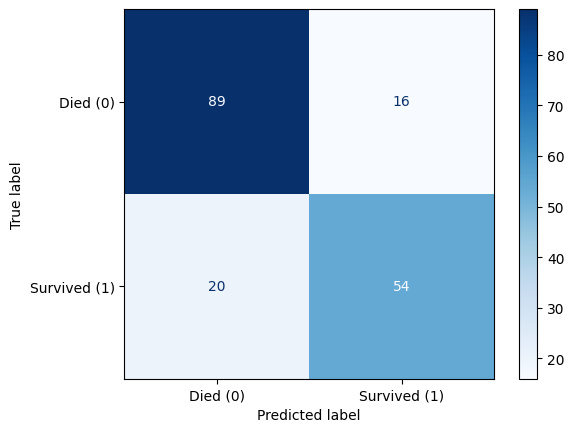

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died (0)', 'Survived (1)'])
disp.plot(cmap='Blues')

In [13]:
comparison_df = X_val.copy()
comparison_df['Actual'] = y_val
comparison_df['Predicted'] = y_pred

# Show mismatches (where model got it wrong)
comparison_df[comparison_df['Actual'] != comparison_df['Predicted']].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Actual,Predicted
709,3,0,28.0,1,1,15.2458,1,1,0
621,1,0,42.0,1,0,52.5542,0,1,0
447,1,0,34.0,0,0,26.5500,0,1,0
673,2,0,31.0,0,0,13.0000,0,1,0
396,3,1,31.0,0,0,7.8542,0,0,1


C:\Users\subha\AppData\Local\Temp\ipykernel_33332\1064311509.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Actual', data=comparison_df, palette='Set2')


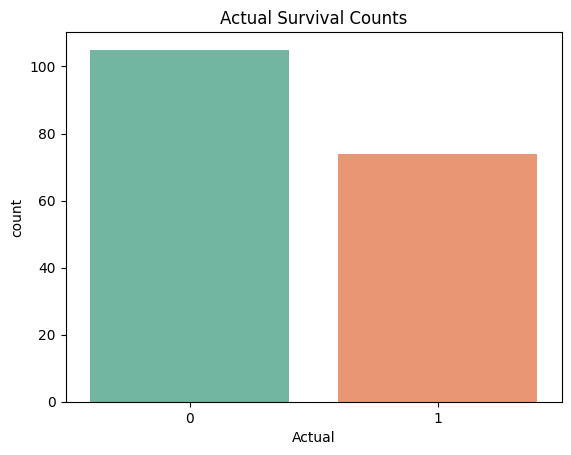

C:\Users\subha\AppData\Local\Temp\ipykernel_33332\1064311509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=comparison_df, palette='Set1')


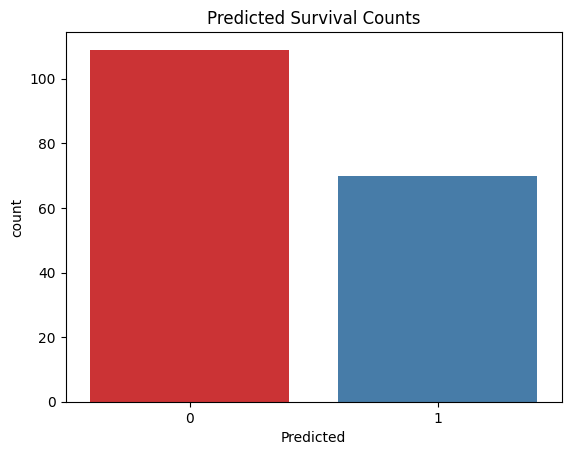

In [14]:
sns.countplot(x='Actual', data=comparison_df, palette='Set2')
plt.title("Actual Survival Counts")
plt.show()

sns.countplot(x='Predicted', data=comparison_df, palette='Set1')
plt.title("Predicted Survival Counts")
plt.show()

## Feature Importance

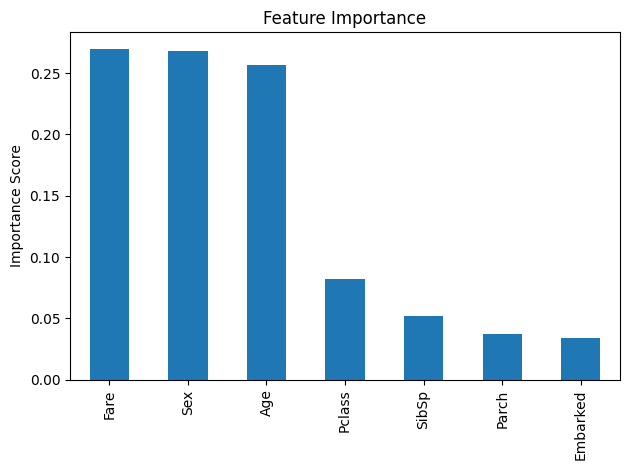

In [15]:
feature_importance = pd.Series(forest.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

## Predict on Actual Test Data

In [16]:
# Prepare test set
X_test = test_df.drop('PassengerId', axis=1)

# The best-performing model- RandomForestClassifier with acuracy rate of 82% is chosen
final_predictions = forest.predict(X_test)

# Prepare submission file
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': final_predictions
})

submission.to_csv('titanic_submission.csv', index=False)